# Customer Segmentation using Clustering Analysis

## Midterm Project - Machine Learning

### Project Overview
This notebook implements a comprehensive end-to-end machine learning pipeline for customer clustering/segmentation based on credit card usage and payment behavior.

### Dataset Description
The dataset contains information about customer credit card usage including:
- **CUST_ID**: Unique customer identifier
- **BALANCE**: Current/average outstanding balance
- **BALANCE_FREQUENCY**: How often balance is updated
- **PURCHASES**: Total purchase amount
- **ONEOFF_PURCHASES**: Large one-time purchases
- **INSTALLMENTS_PURCHASES**: Purchases paid in installments
- **CASH_ADVANCE**: Total cash withdrawn using card
- **PURCHASES_FREQUENCY**: Frequency of purchases
- **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment purchases
- **CASH_ADVANCE_FREQUENCY**: Frequency of cash advances
- **CASH_ADVANCE_TRX**: Number of cash advance transactions
- **PURCHASES_TRX**: Number of purchase transactions
- **CREDIT_LIMIT**: Maximum credit available
- **PAYMENTS**: Amount paid back
- **MINIMUM_PAYMENTS**: Total minimum payments made
- **PRC_FULL_PAYMENT**: Proportion of full balance payments
- **TENURE**: Duration of card ownership (months)

### Pipeline Steps
1. Data Loading & Exploration
2. Data Preprocessing & Cleaning
3. Feature Engineering
4. Clustering Model Implementation (K-Means, Hierarchical, DBSCAN)
5. Model Evaluation & Comparison
6. Cluster Interpretation & Profiling

In [47]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dendogram for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [48]:
## 2. Data Loading & Initial Exploration

In [49]:
# Load the dataset
df = pd.read_csv('clusteringmidterm.csv')

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn Names:\n{df.columns.tolist()}")

# Display first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS OF THE DATASET")
print("=" * 60)
display(df.head())

DATASET OVERVIEW

Dataset Shape: 8950 rows, 18 columns

Column Names:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

FIRST 5 ROWS OF THE DATASET


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [50]:
# Data types and missing values analysis
print("=" * 60)
print("DATA TYPES & MISSING VALUES")
print("=" * 60)
print("\nData Types:")
print(df.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

DATA TYPES & MISSING VALUES

Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

MISSING VALUES ANALYSIS
                  Missing Values  Percentage (%)
CREDIT_LIMIT                   1            0.01
MINIMUM_PAYMENTS             3

In [51]:
# Statistical summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
display(df.describe().T)

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


## 3. Exploratory Data Analysis (EDA)

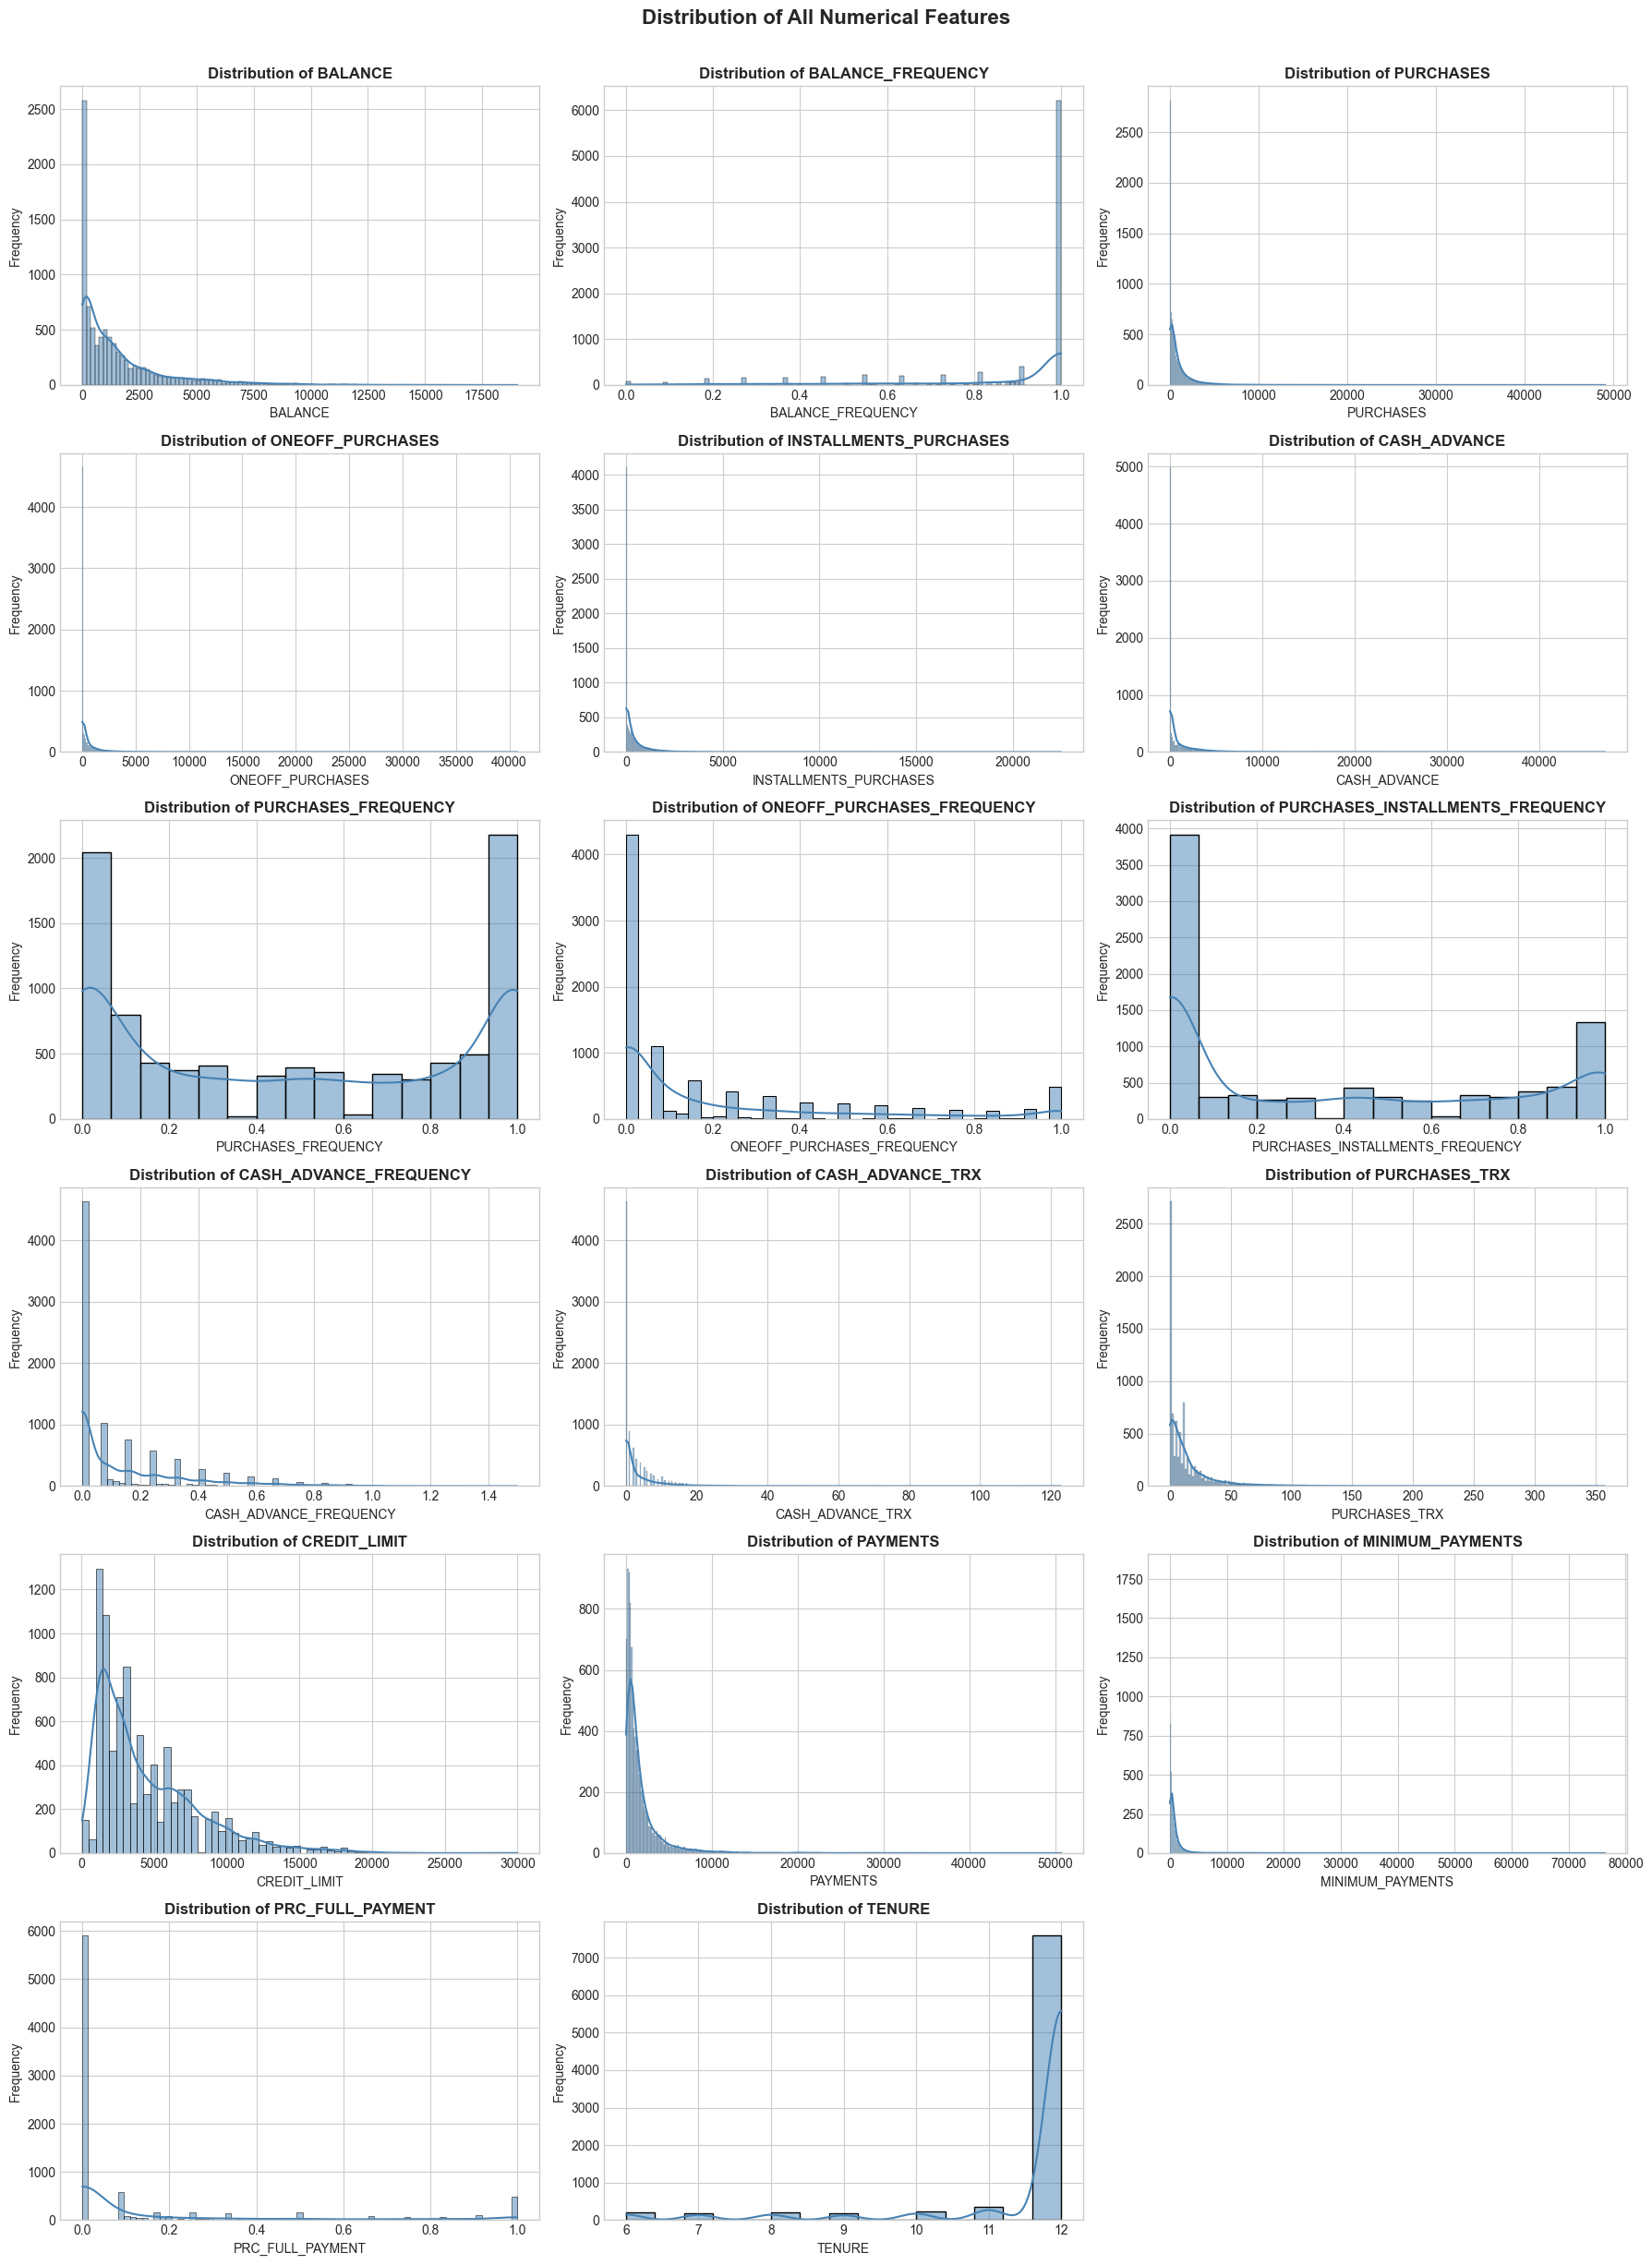

In [52]:
# Distribution of numerical features
# Select only numerical columns (excluding CUST_ID)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.histplot(df[col], kde=True, ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

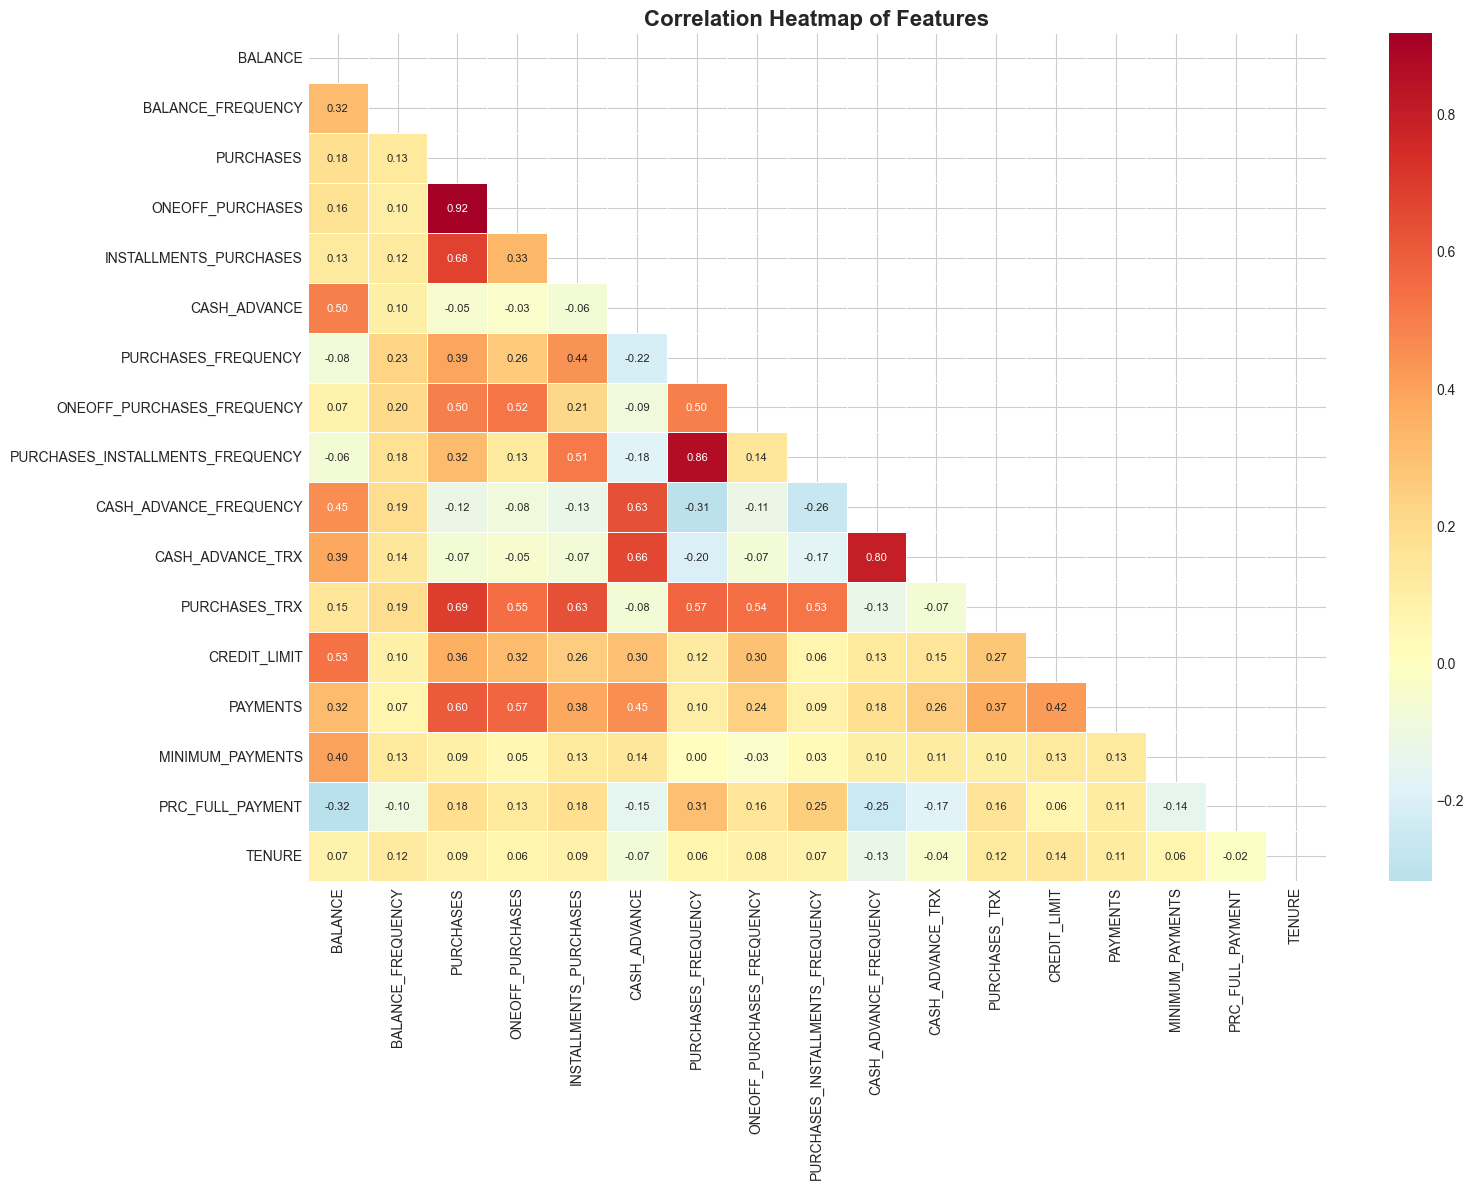


HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.7)


,Feature 1,Feature 2,Correlation
0,ONEOFF_PURCHASES,PURCHASES,0.92
1,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,0.86
2,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,0.80


In [53]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df[numerical_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print highly correlated pairs
print("\n" + "=" * 60)
print("HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.7)")
print("=" * 60)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    display(pd.DataFrame(high_corr).sort_values('Correlation', ascending=False))
else:
    print("No highly correlated pairs found.")

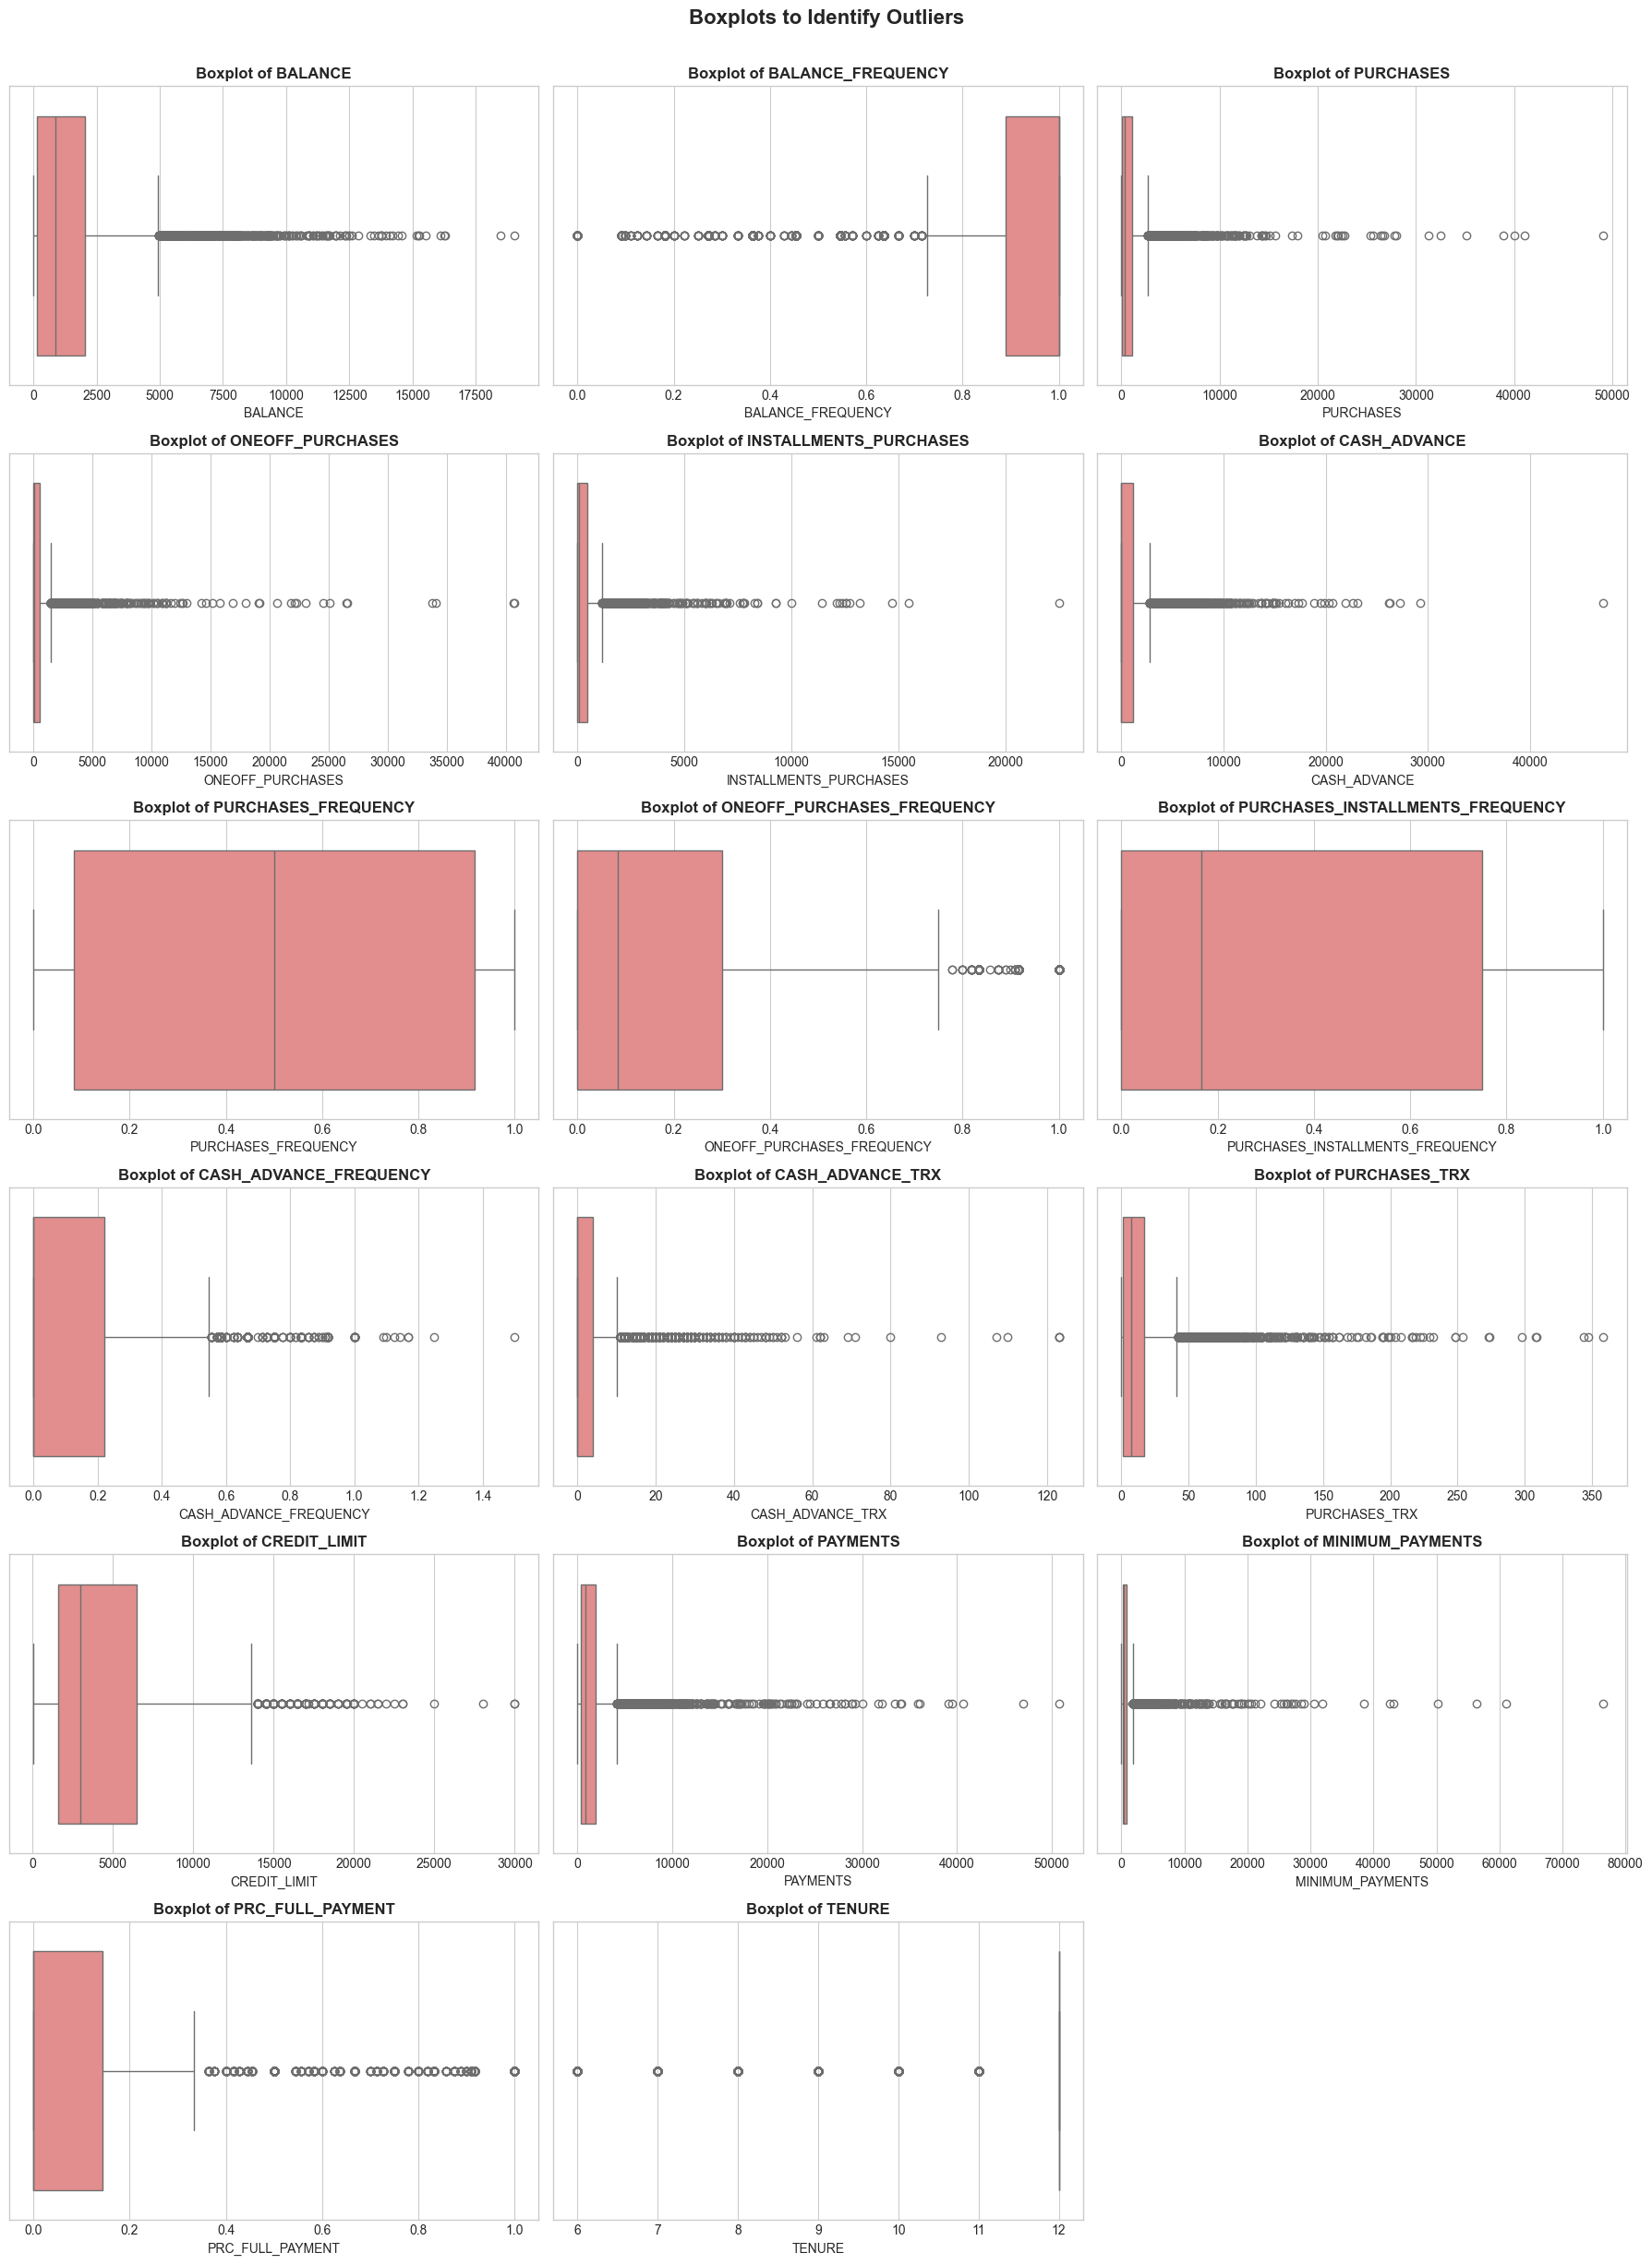

In [54]:
# Box plots to visualize outliers
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.boxplot(x=df[col], ax=ax, color='lightcoral')
    ax.set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Boxplots to Identify Outliers', fontsize=16, fontweight='bold', y=1.02)
plt.show()

## 4. Data Preprocessing & Cleaning

In [55]:
# Create a copy of the dataframe for preprocessing
df_clean = df.copy()

# Drop the CUST_ID column as it's not useful for clustering
df_clean = df_clean.drop('CUST_ID', axis=1)

print("=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)
print(f"\nMissing values before imputation:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Impute missing values with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

print(f"\nMissing values after imputation:")
print(df_imputed.isnull().sum().sum())

print("\n✅ Missing values handled successfully using median imputation!")

HANDLING MISSING VALUES

Missing values before imputation:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Missing values after imputation:
0

✅ Missing values handled successfully using median imputation!


In [56]:
# Outlier Detection and Handling using IQR method
print("=" * 60)
print("OUTLIER DETECTION & HANDLING")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Count outliers for each column
outlier_info = []
for col in df_imputed.columns:
    count, lower, upper = detect_outliers_iqr(df_imputed, col)
    outlier_info.append({
        'Feature': col,
        'Outlier Count': count,
        'Percentage': f"{(count/len(df_imputed))*100:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_info)
print("\nOutlier Count per Feature:")
display(outlier_df)

# Cap outliers using IQR method (Winsorization)
def cap_outliers_iqr(data, column):
    """Cap outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Apply outlier capping
df_capped = df_imputed.copy()
for col in df_capped.columns:
    df_capped = cap_outliers_iqr(df_capped, col)

print("\n✅ Outliers capped using IQR Winsorization method!")

OUTLIER DETECTION & HANDLING

Outlier Count per Feature:


,Feature,Outlier Count,Percentage
0,BALANCE,695,7.77%
1,BALANCE_FREQUENCY,1493,16.68%
2,PURCHASES,808,9.03%
3,ONEOFF_PURCHASES,1013,11.32%
4,INSTALLMENTS_PURCHASES,867,9.69%
5,CASH_ADVANCE,1030,11.51%
6,PURCHASES_FREQUENCY,0,0.00%
7,ONEOFF_PURCHASES_FREQUENCY,782,8.74%
8,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.00%
9,CASH_ADVANCE_FREQUENCY,525,5.87%



✅ Outliers capped using IQR Winsorization method!


## 5. Feature Engineering

In [57]:
# Create meaningful derived features for better clustering
df_features = df_capped.copy()

print("=" * 60)
print("FEATURE ENGINEERING - Creating Derived Features")
print("=" * 60)

# 1. Credit Utilization Ratio: Balance / Credit Limit
df_features['CREDIT_UTILIZATION'] = df_features['BALANCE'] / (df_features['CREDIT_LIMIT'] + 1e-6)

# 2. Payment to Balance Ratio: How much of the balance is being paid
df_features['PAYMENT_RATIO'] = df_features['PAYMENTS'] / (df_features['BALANCE'] + 1e-6)

# 3. Cash Advance Ratio: Cash Advance / Credit Limit
df_features['CASH_ADVANCE_RATIO'] = df_features['CASH_ADVANCE'] / (df_features['CREDIT_LIMIT'] + 1e-6)

# 4. Purchase to Credit Limit Ratio
df_features['PURCHASE_CREDIT_RATIO'] = df_features['PURCHASES'] / (df_features['CREDIT_LIMIT'] + 1e-6)

# 5. Average Purchase per Transaction
df_features['AVG_PURCHASE_TRX'] = df_features['PURCHASES'] / (df_features['PURCHASES_TRX'] + 1e-6)

# 6. One-off to Installment Purchase Ratio
df_features['ONEOFF_INSTALLMENT_RATIO'] = df_features['ONEOFF_PURCHASES'] / (df_features['INSTALLMENTS_PURCHASES'] + 1e-6)

# 7. Monthly Average Balance
df_features['MONTHLY_AVG_BALANCE'] = df_features['BALANCE'] / (df_features['TENURE'] + 1e-6)

# 8. Monthly Average Purchases
df_features['MONTHLY_AVG_PURCHASES'] = df_features['PURCHASES'] / (df_features['TENURE'] + 1e-6)

print("\nNew Features Created:")
new_features = ['CREDIT_UTILIZATION', 'PAYMENT_RATIO', 'CASH_ADVANCE_RATIO', 
                'PURCHASE_CREDIT_RATIO', 'AVG_PURCHASE_TRX', 'ONEOFF_INSTALLMENT_RATIO',
                'MONTHLY_AVG_BALANCE', 'MONTHLY_AVG_PURCHASES']
for feat in new_features:
    print(f"  • {feat}")

print(f"\nDataset shape after feature engineering: {df_features.shape}")
display(df_features.head())

FEATURE ENGINEERING - Creating Derived Features

New Features Created:
  • CREDIT_UTILIZATION
  • PAYMENT_RATIO
  • CASH_ADVANCE_RATIO
  • PURCHASE_CREDIT_RATIO
  • AVG_PURCHASE_TRX
  • ONEOFF_INSTALLMENT_RATIO
  • MONTHLY_AVG_BALANCE
  • MONTHLY_AVG_PURCHASES

Dataset shape after feature engineering: (8950, 25)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,PAYMENT_RATIO,CASH_ADVANCE_RATIO,PURCHASE_CREDIT_RATIO,AVG_PURCHASE_TRX,ONEOFF_INSTALLMENT_RATIO,MONTHLY_AVG_BALANCE,MONTHLY_AVG_PURCHASES
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0.00,2.00,1000.00,201.80,139.51,0.00,12.00,0.04,4.93,0.00,0.10,47.70,0.00,3.41,7.95
1,3202.47,0.91,0.00,0.00,0.00,2784.55,0.00,0.00,0.00,0.25,4.00,0.00,7000.00,4103.03,1072.34,0.22,12.00,0.46,1.28,0.40,0.00,0.00,0.00,266.87,0.00
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,0.75,0.00,0.00,0.00,12.00,7500.00,622.07,627.28,0.00,12.00,0.33,0.25,0.00,0.10,64.43,773170000.00,207.93,64.43
3,1666.67,0.72,1499.00,1443.51,0.00,205.79,0.08,0.08,0.00,0.08,1.00,1.00,7500.00,0.00,312.34,0.00,12.00,0.22,0.00,0.03,0.20,1499.00,1443512500.00,138.89,124.92
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0.00,1.00,1200.00,678.33,244.79,0.00,12.00,0.68,0.83,0.00,0.01,16.00,16000000.00,68.14,1.33


In [58]:
# Handle any infinite values from division
df_features = df_features.replace([np.inf, -np.inf], np.nan)
df_features = df_features.fillna(df_features.median())

# Feature Scaling using StandardScaler
print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

print("\nScaled Data Statistics:")
display(df_scaled.describe().T[['mean', 'std', 'min', 'max']])

print("\n✅ Features scaled using StandardScaler (mean=0, std=1)")

FEATURE SCALING

Scaled Data Statistics:


,mean,std,min,max
BALANCE,-0.00,1.00,-0.90,2.31
BALANCE_FREQUENCY,-0.00,1.00,-1.89,0.62
PURCHASES,0.00,1.00,-0.84,2.25
ONEOFF_PURCHASES,0.00,1.00,-0.69,2.13
INSTALLMENTS_PURCHASES,0.00,1.00,-0.75,2.21
CASH_ADVANCE,0.00,1.00,-0.67,2.12
PURCHASES_FREQUENCY,0.00,1.00,-1.22,1.27
ONEOFF_PURCHASES_FREQUENCY,-0.00,1.00,-0.72,2.21
PURCHASES_INSTALLMENTS_FREQUENCY,0.00,1.00,-0.92,1.60
CASH_ADVANCE_FREQUENCY,-0.00,1.00,-0.73,2.49



✅ Features scaled using StandardScaler (mean=0, std=1)


## 6. Dimensionality Reduction with PCA (for visualization)

PCA - DIMENSIONALITY REDUCTION


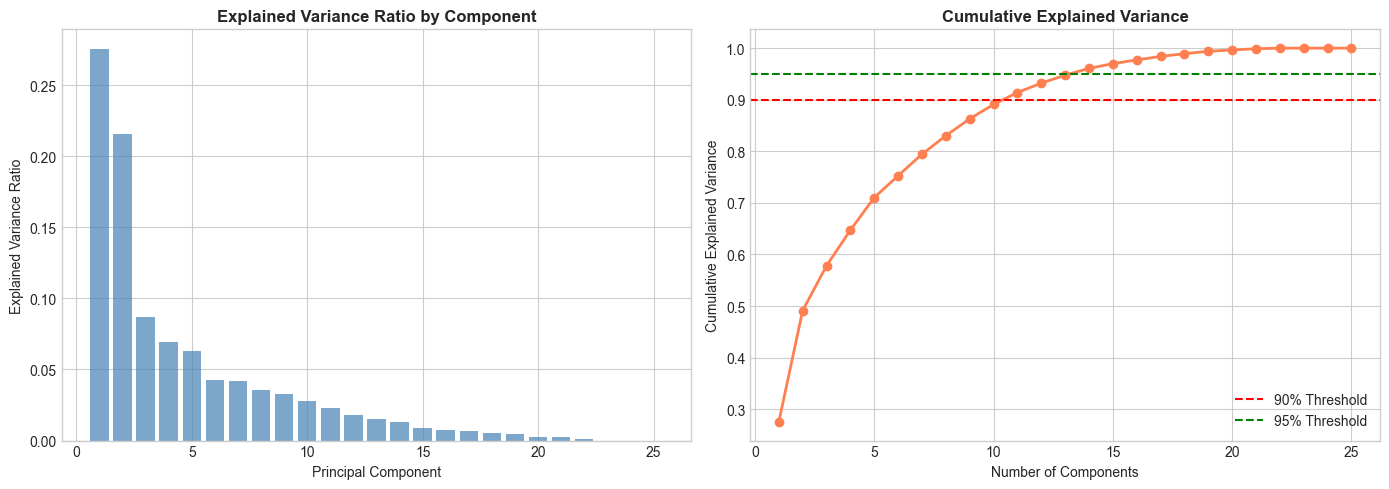


Number of components to explain 90% variance: 11
Number of components to explain 95% variance: 14

2D PCA explains 49.11% of variance


In [59]:
# Apply PCA to reduce dimensionality for visualization
print("=" * 60)
print("PCA - DIMENSIONALITY REDUCTION")
print("=" * 60)

# First, let's see how many components explain variance
pca_full = PCA()
pca_full.fit(df_scaled)

# Plot explained variance ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Explained variance ratio
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
            pca_full.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance Ratio by Component', fontweight='bold')

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             marker='o', color='coral', linewidth=2)
axes[1].axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
axes[1].axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNumber of components to explain 90% variance: {n_components_90}")
print(f"Number of components to explain 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)
print(f"\n2D PCA explains {pca_2d.explained_variance_ratio_.sum()*100:.2f}% of variance")

## 7. Clustering Model Implementation

### 7.1 K-Means Clustering

K-MEANS CLUSTERING - OPTIMAL K SELECTION


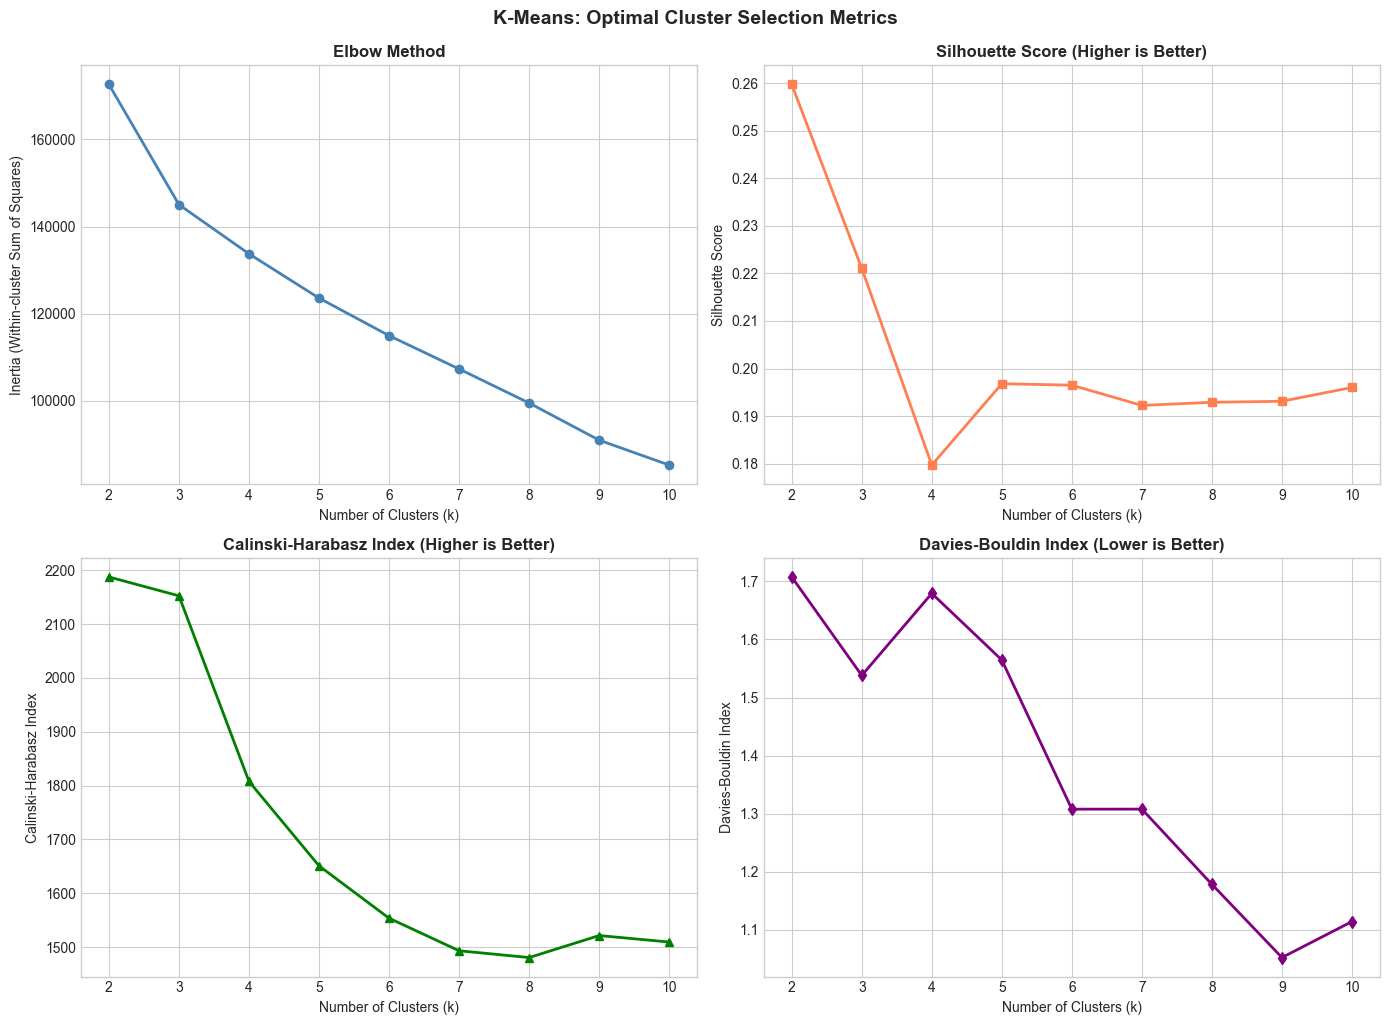


Optimal K based on different metrics:
  • Silhouette Score: k = 2 (score: 0.2597)
  • Calinski-Harabasz: k = 2 (score: 2187.7438)
  • Davies-Bouldin: k = 9 (score: 1.0521)


In [60]:
# K-Means: Finding optimal number of clusters using Elbow Method and Silhouette Score
print("=" * 60)
print("K-MEANS CLUSTERING - OPTIMAL K SELECTION")
print("=" * 60)

# Range of k values to test
k_range = range(2, 11)

# Store metrics
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(df_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, kmeans.labels_))

# Plot the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow Method (Inertia)
axes[0, 0].plot(k_range, inertias, marker='o', linewidth=2, color='steelblue')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)')
axes[0, 0].set_title('Elbow Method', fontweight='bold')
axes[0, 0].set_xticks(list(k_range))

# Silhouette Score (higher is better)
axes[0, 1].plot(k_range, silhouette_scores, marker='s', linewidth=2, color='coral')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0, 1].set_xticks(list(k_range))

# Calinski-Harabasz Index (higher is better)
axes[1, 0].plot(k_range, calinski_scores, marker='^', linewidth=2, color='green')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz Index')
axes[1, 0].set_title('Calinski-Harabasz Index (Higher is Better)', fontweight='bold')
axes[1, 0].set_xticks(list(k_range))

# Davies-Bouldin Index (lower is better)
axes[1, 1].plot(k_range, davies_bouldin_scores, marker='d', linewidth=2, color='purple')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[1, 1].set_xticks(list(k_range))

plt.tight_layout()
plt.suptitle('K-Means: Optimal Cluster Selection Metrics', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Print best k based on each metric
print("\nOptimal K based on different metrics:")
print(f"  • Silhouette Score: k = {k_range[np.argmax(silhouette_scores)]} (score: {max(silhouette_scores):.4f})")
print(f"  • Calinski-Harabasz: k = {k_range[np.argmax(calinski_scores)]} (score: {max(calinski_scores):.4f})")
print(f"  • Davies-Bouldin: k = {k_range[np.argmin(davies_bouldin_scores)]} (score: {min(davies_bouldin_scores):.4f})")

K-MEANS CLUSTERING WITH K = 4


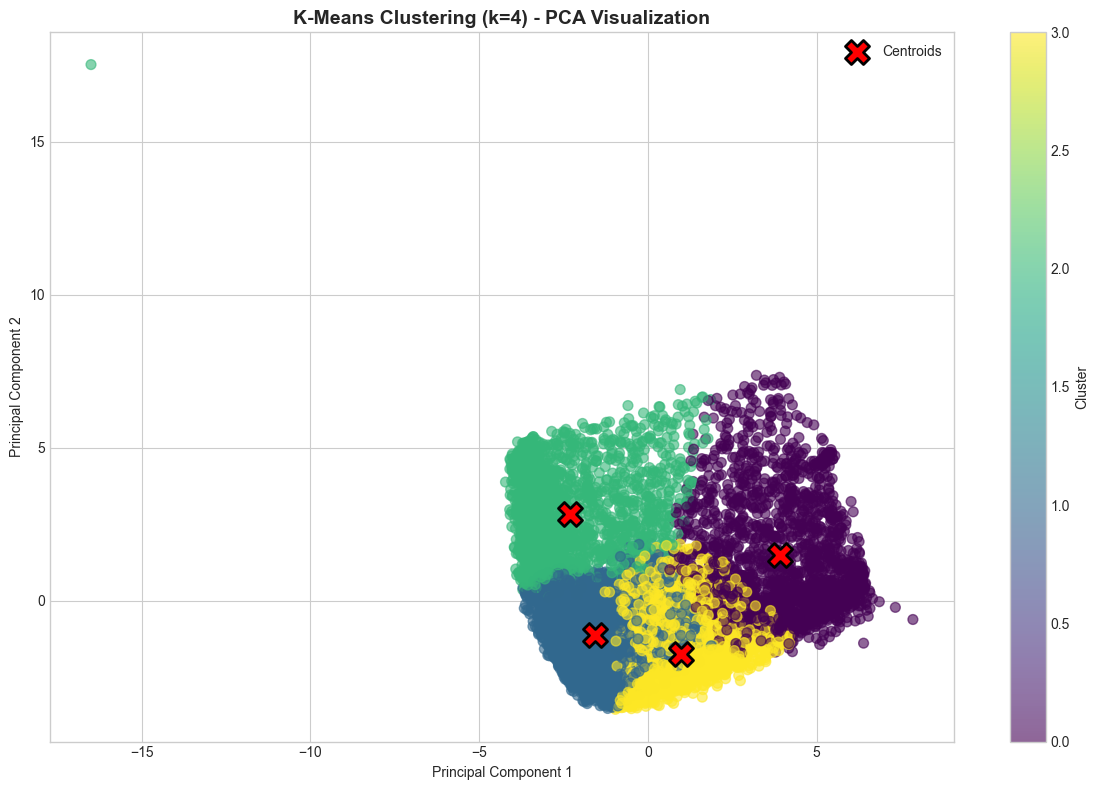


Cluster Distribution:
0    1719
1    3189
2    1750
3    2292
Name: count, dtype: int64


In [61]:
# Apply K-Means with optimal K (we'll use k=4 as a balanced choice based on metrics)
# You can adjust this based on the elbow plot and domain knowledge
optimal_k = 4

print("=" * 60)
print(f"K-MEANS CLUSTERING WITH K = {optimal_k}")
print("=" * 60)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_features['KMeans_Cluster'] = kmeans_labels

# Visualize clusters in 2D PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=kmeans_labels, 
                      cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')

# Plot centroids
centroids_pca = pca_2d.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', 
            s=300, edgecolors='black', linewidth=2, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k}) - PCA Visualization', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# Cluster distribution
print(f"\nCluster Distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

### 7.2 Hierarchical (Agglomerative) Clustering

HIERARCHICAL CLUSTERING - DENDROGRAM


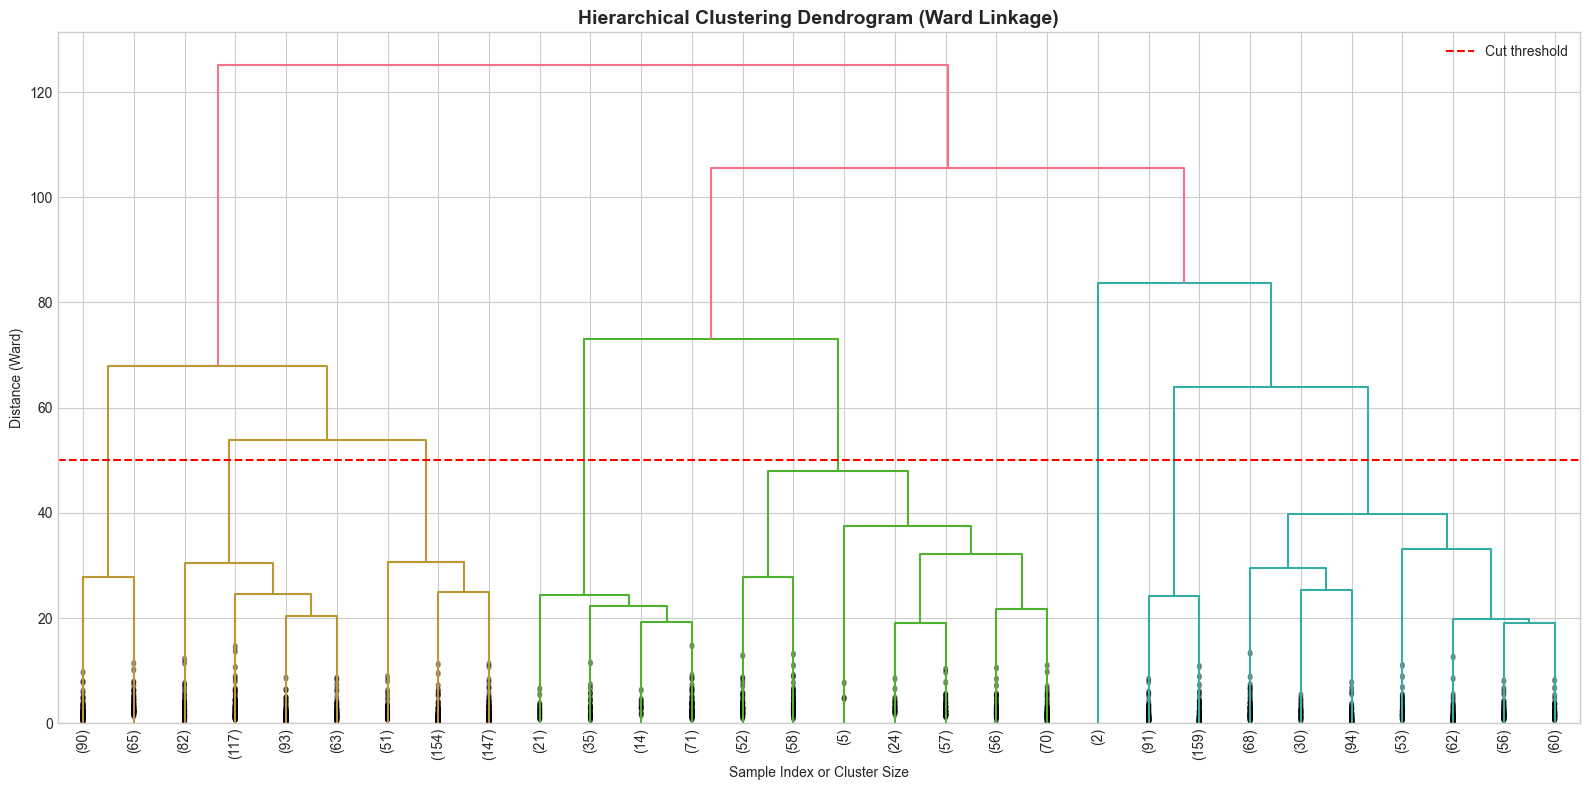


Note: Dendrogram helps visualize the hierarchical structure and choose optimal clusters.


In [62]:
# Hierarchical Clustering - Dendrogram
print("=" * 60)
print("HIERARCHICAL CLUSTERING - DENDROGRAM")
print("=" * 60)

# Sample data for dendrogram (using full dataset might be too large)
sample_size = min(2000, len(df_scaled))
np.random.seed(42)
sample_indices = np.random.choice(len(df_scaled), sample_size, replace=False)
df_sample = df_scaled.iloc[sample_indices]

# Create linkage matrix
linkage_matrix = linkage(df_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, 
           leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance (Ward)')
plt.axhline(y=50, color='r', linestyle='--', label='Cut threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("\nNote: Dendrogram helps visualize the hierarchical structure and choose optimal clusters.")

AGGLOMERATIVE CLUSTERING WITH 4 CLUSTERS


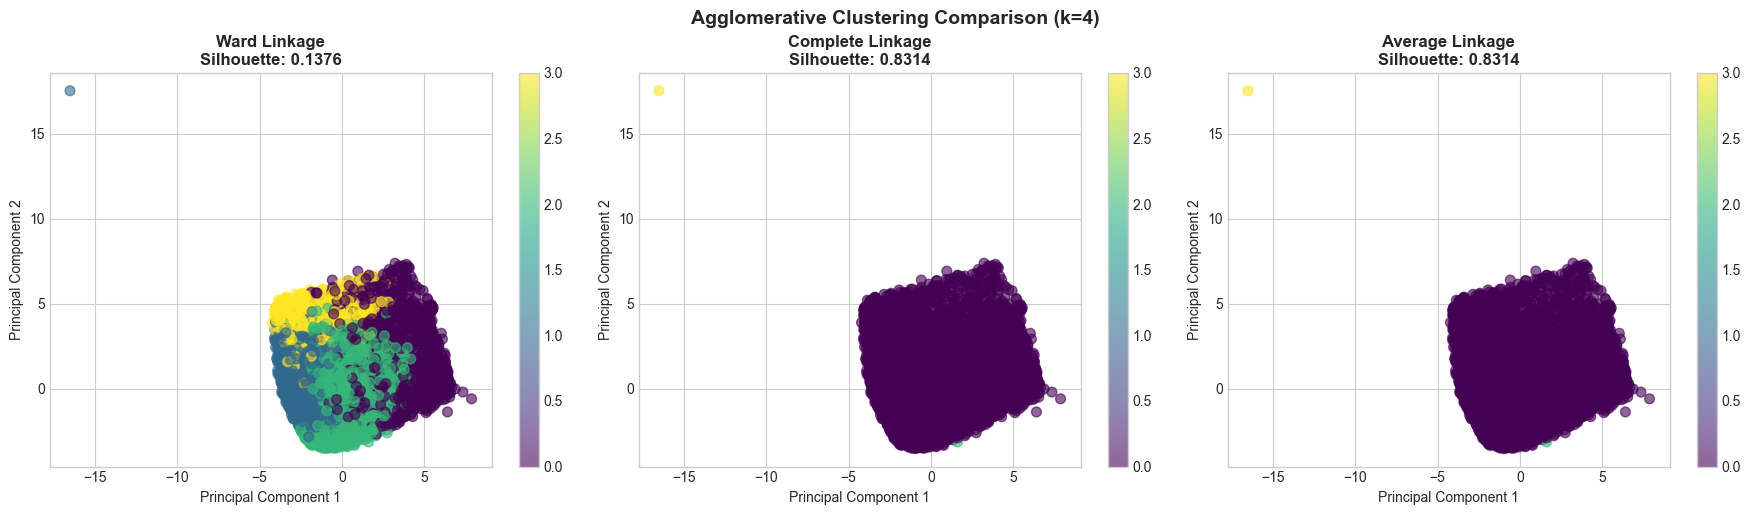


Best performing linkage method: complete


In [63]:
# Apply Agglomerative Clustering
print("=" * 60)
print(f"AGGLOMERATIVE CLUSTERING WITH {optimal_k} CLUSTERS")
print("=" * 60)

# Use different linkage methods
linkage_methods = ['ward', 'complete', 'average']
agg_results = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, method in enumerate(linkage_methods):
    agg = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    agg_labels = agg.fit_predict(df_scaled)
    agg_results[method] = agg_labels
    
    # Calculate silhouette score
    sil_score = silhouette_score(df_scaled, agg_labels)
    
    # Visualize
    scatter = axes[idx].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=agg_labels, 
                                cmap='viridis', alpha=0.6, s=50)
    axes[idx].set_xlabel('Principal Component 1')
    axes[idx].set_ylabel('Principal Component 2')
    axes[idx].set_title(f'{method.capitalize()} Linkage\nSilhouette: {sil_score:.4f}', 
                       fontweight='bold')
    plt.colorbar(scatter, ax=axes[idx])

plt.tight_layout()
plt.suptitle(f'Agglomerative Clustering Comparison (k={optimal_k})', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Add best performing hierarchical labels to dataframe
best_linkage = max(linkage_methods, 
                   key=lambda x: silhouette_score(df_scaled, agg_results[x]))
df_features['Hierarchical_Cluster'] = agg_results[best_linkage]
print(f"\nBest performing linkage method: {best_linkage}")

### 7.3 DBSCAN Clustering

DBSCAN CLUSTERING - PARAMETER TUNING


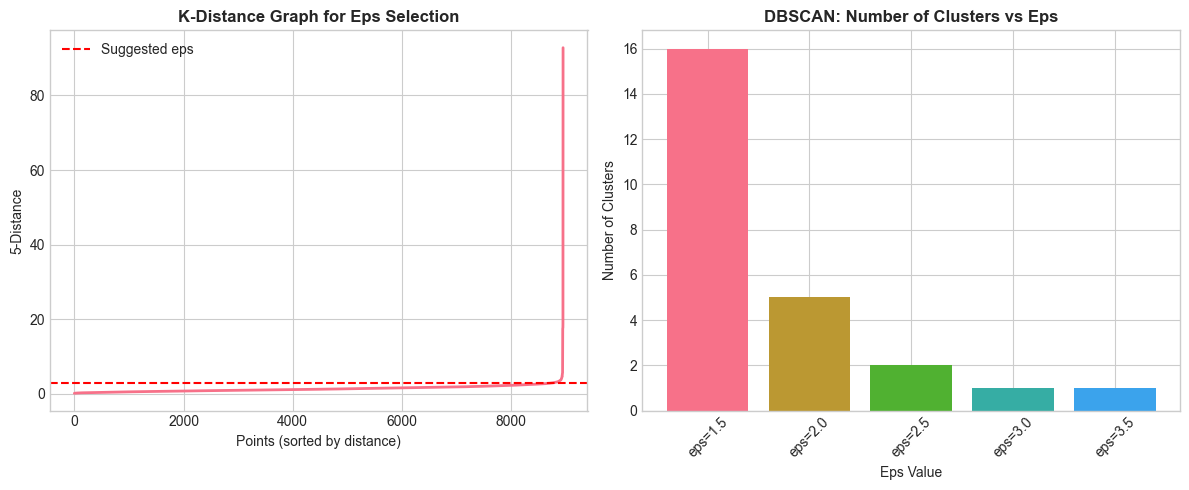

In [64]:
# DBSCAN - Finding optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

print("=" * 60)
print("DBSCAN CLUSTERING - PARAMETER TUNING")
print("=" * 60)

# Calculate k-distance for eps selection
k = 5  # min_samples - 1
nn = NearestNeighbors(n_neighbors=k)
nn.fit(df_scaled)
distances, indices = nn.kneighbors(df_scaled)

# Sort distances
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_distances, linewidth=2)
plt.xlabel('Points (sorted by distance)')
plt.ylabel(f'{k}-Distance')
plt.title('K-Distance Graph for Eps Selection', fontweight='bold')
plt.axhline(y=3, color='r', linestyle='--', label='Suggested eps')
plt.legend()

# Test different eps values
eps_values = [1.5, 2.0, 2.5, 3.0, 3.5]
min_samples = 5

plt.subplot(1, 2, 2)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    plt.bar(f'eps={eps}', n_clusters, label=f'Noise: {n_noise}')
    
plt.xlabel('Eps Value')
plt.ylabel('Number of Clusters')
plt.title('DBSCAN: Number of Clusters vs Eps', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DBSCAN CLUSTERING - FINAL MODEL

DBSCAN Parameters: eps=3.0, min_samples=5
Number of clusters found: 1
Number of noise points: 71 (0.79%)


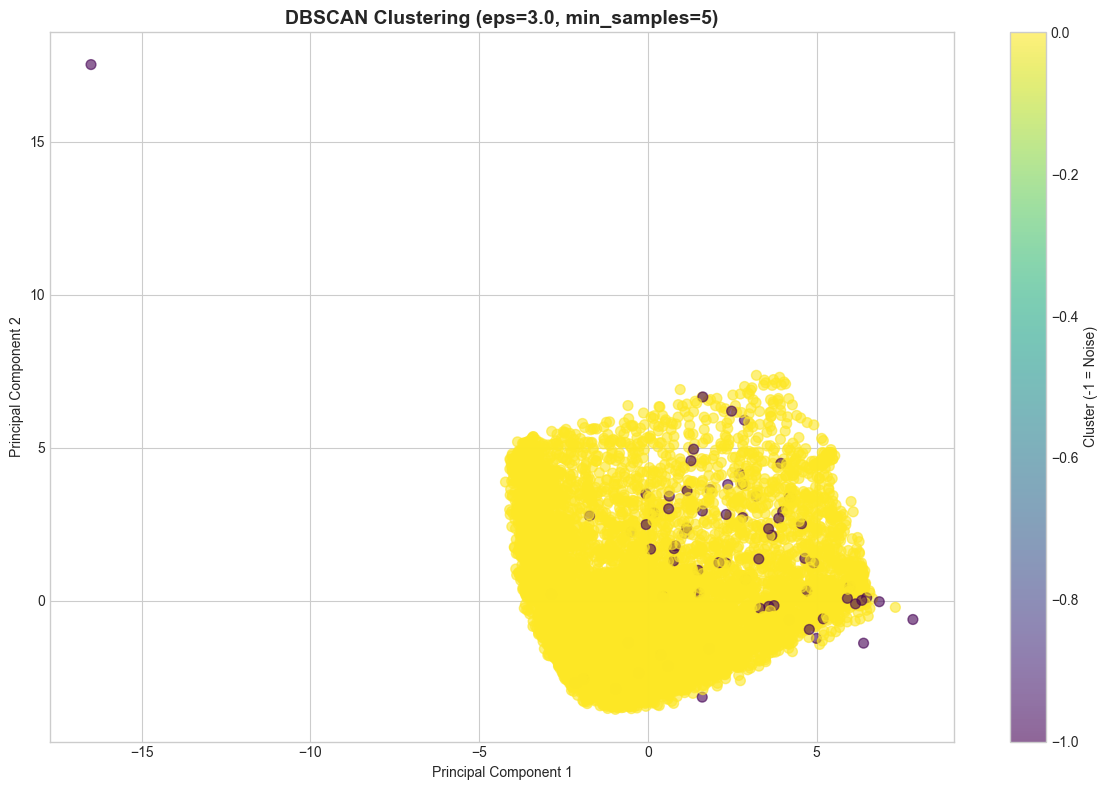


Cluster Distribution (including noise as -1):
-1      71
 0    8879
Name: count, dtype: int64


In [65]:
# Apply DBSCAN with optimal parameters
print("=" * 60)
print("DBSCAN CLUSTERING - FINAL MODEL")
print("=" * 60)

# Best eps based on k-distance graph (adjust based on the elbow)
best_eps = 3.0
best_min_samples = 5

dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan_final.fit_predict(df_scaled)

# Statistics
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise} ({(n_noise/len(dbscan_labels))*100:.2f}%)")

# Visualize DBSCAN results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=dbscan_labels, 
                      cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster (-1 = Noise)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Add DBSCAN labels to dataframe
df_features['DBSCAN_Cluster'] = dbscan_labels

# DBSCAN Cluster distribution
print(f"\nCluster Distribution (including noise as -1):")
print(pd.Series(dbscan_labels).value_counts().sort_index())

## 8. Model Evaluation & Comparison

CLUSTERING MODELS COMPARISON

Clustering Performance Metrics:


,Model,Silhouette Score,Calinski-Harabasz,Davies-Bouldin,Num Clusters,Noise Points
0,K-Means,0.18,1807.69,1.68,4,0
1,Hierarchical (complete),0.83,394.56,0.22,4,0
2,DBSCAN,NaN,NaN,NaN,1,71


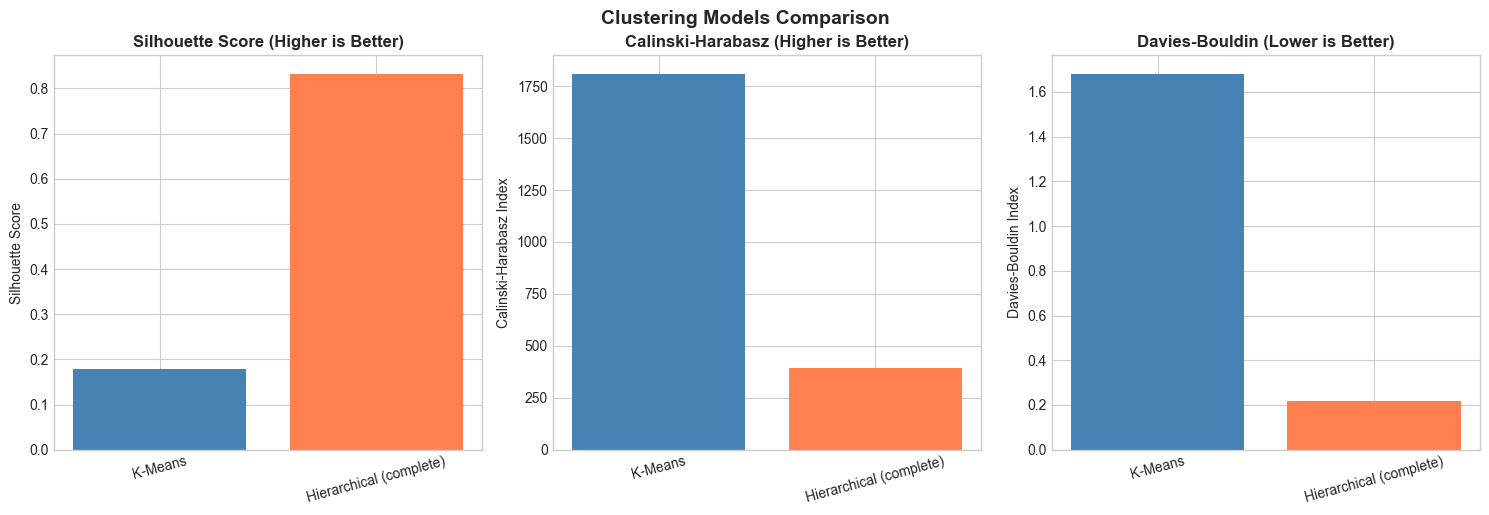


🏆 Best performing model based on Silhouette Score: Hierarchical (complete)


In [66]:
# Compare all clustering algorithms
print("=" * 60)
print("CLUSTERING MODELS COMPARISON")
print("=" * 60)

# Calculate metrics for each model
def calculate_metrics(labels, data, model_name):
    """Calculate clustering metrics, handling noise points for DBSCAN"""
    # Filter out noise points (-1) for DBSCAN
    mask = labels != -1
    if mask.sum() < 2:  # Need at least 2 points
        return {
            'Model': model_name,
            'Silhouette Score': np.nan,
            'Calinski-Harabasz': np.nan,
            'Davies-Bouldin': np.nan,
            'Num Clusters': len(set(labels)) - (1 if -1 in labels else 0),
            'Noise Points': (labels == -1).sum()
        }
    
    data_filtered = data[mask]
    labels_filtered = labels[mask]
    
    # Check if there's more than 1 cluster after filtering
    if len(set(labels_filtered)) < 2:
        return {
            'Model': model_name,
            'Silhouette Score': np.nan,
            'Calinski-Harabasz': np.nan,
            'Davies-Bouldin': np.nan,
            'Num Clusters': len(set(labels_filtered)),
            'Noise Points': (labels == -1).sum()
        }
    
    return {
        'Model': model_name,
        'Silhouette Score': silhouette_score(data_filtered, labels_filtered),
        'Calinski-Harabasz': calinski_harabasz_score(data_filtered, labels_filtered),
        'Davies-Bouldin': davies_bouldin_score(data_filtered, labels_filtered),
        'Num Clusters': len(set(labels_filtered)),
        'Noise Points': (labels == -1).sum() if -1 in labels else 0
    }

# Calculate metrics for all models
comparison_results = []
comparison_results.append(calculate_metrics(kmeans_labels, df_scaled.values, 'K-Means'))
comparison_results.append(calculate_metrics(agg_results[best_linkage], df_scaled.values, 
                                            f'Hierarchical ({best_linkage})'))
comparison_results.append(calculate_metrics(dbscan_labels, df_scaled.values, 'DBSCAN'))

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_results)
print("\nClustering Performance Metrics:")
display(comparison_df)

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Silhouette Score (higher is better)
colors = ['steelblue', 'coral', 'green']
axes[0].bar(comparison_df['Model'], comparison_df['Silhouette Score'], color=colors)
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)

# Calinski-Harabasz (higher is better)
axes[1].bar(comparison_df['Model'], comparison_df['Calinski-Harabasz'], color=colors)
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].set_title('Calinski-Harabasz (Higher is Better)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)

# Davies-Bouldin (lower is better)
axes[2].bar(comparison_df['Model'], comparison_df['Davies-Bouldin'], color=colors)
axes[2].set_ylabel('Davies-Bouldin Index')
axes[2].set_title('Davies-Bouldin (Lower is Better)', fontweight='bold')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.suptitle('Clustering Models Comparison', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Determine best model
valid_results = comparison_df.dropna(subset=['Silhouette Score'])
if not valid_results.empty:
    best_model = valid_results.loc[valid_results['Silhouette Score'].idxmax(), 'Model']
    print(f"\n🏆 Best performing model based on Silhouette Score: {best_model}")

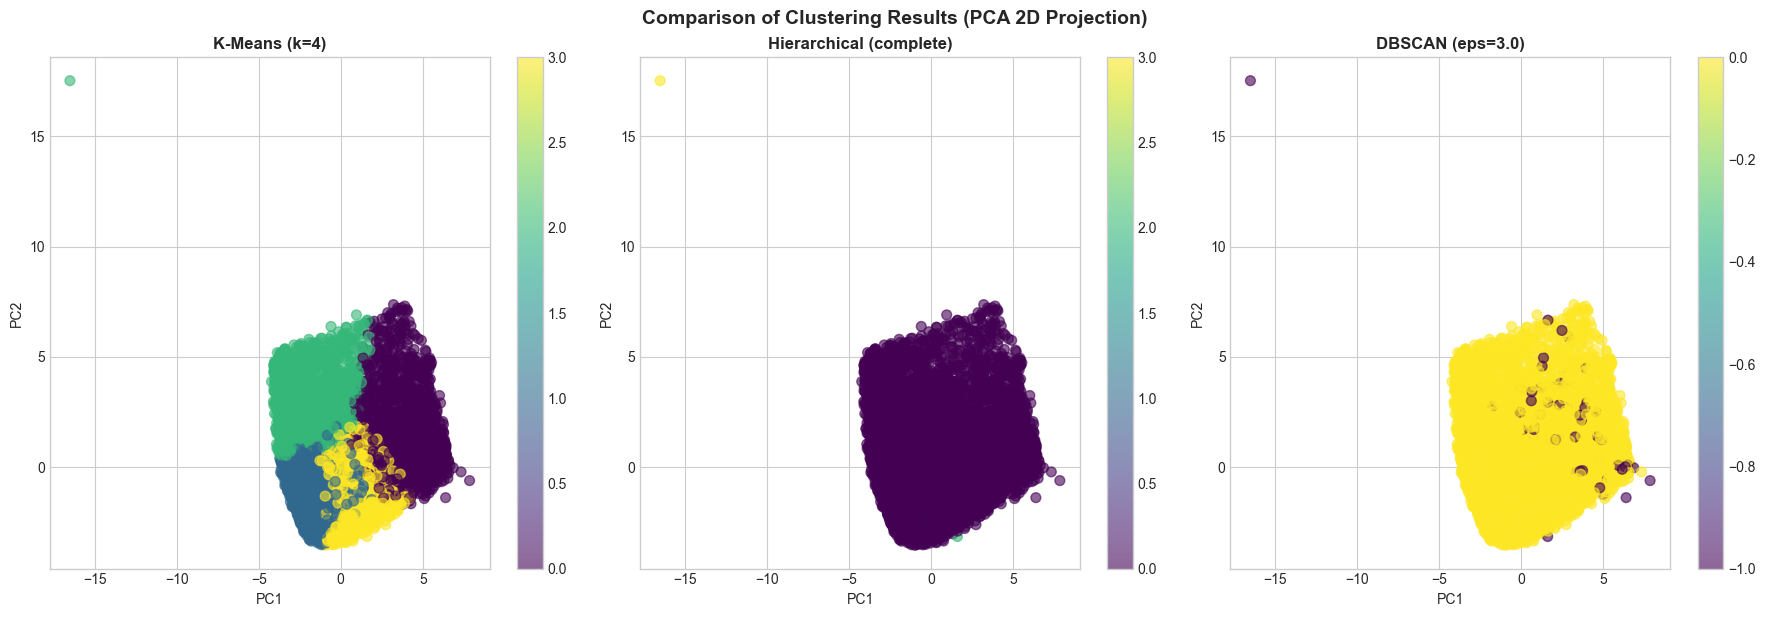

In [67]:
# Side-by-side visualization of all clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means
scatter1 = axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=kmeans_labels, 
                           cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title(f'K-Means (k={optimal_k})', fontsize=12, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0])

# Hierarchical
scatter2 = axes[1].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=agg_results[best_linkage], 
                           cmap='viridis', alpha=0.6, s=50)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title(f'Hierarchical ({best_linkage})', fontsize=12, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1])

# DBSCAN
scatter3 = axes[2].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=dbscan_labels, 
                           cmap='viridis', alpha=0.6, s=50)
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title(f'DBSCAN (eps={best_eps})', fontsize=12, fontweight='bold')
plt.colorbar(scatter3, ax=axes[2])

plt.tight_layout()
plt.suptitle('Comparison of Clustering Results (PCA 2D Projection)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 9. Cluster Interpretation & Customer Profiling

We will use the K-Means clustering results for final analysis since it typically provides the most balanced and interpretable clusters.

In [68]:
# Cluster Profiling - Analyze characteristics of each cluster
print("=" * 60)
print("CLUSTER PROFILING - K-MEANS RESULTS")
print("=" * 60)

# Create a copy with original scale features for interpretation
df_profile = df_features.copy()

# Key features for profiling
profile_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                   'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
                   'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_UTILIZATION', 'PAYMENT_RATIO']

# Calculate mean for each cluster
cluster_profile = df_profile.groupby('KMeans_Cluster')[profile_features].mean()
print("\nCluster Mean Values:")
display(cluster_profile.T.style.background_gradient(cmap='YlOrRd', axis=1))

# Cluster sizes
print("\nCluster Sizes:")
cluster_sizes = df_profile['KMeans_Cluster'].value_counts().sort_index()
print(cluster_sizes)
print(f"\nPercentage Distribution:")
print((cluster_sizes / len(df_profile) * 100).round(2).astype(str) + '%')

CLUSTER PROFILING - K-MEANS RESULTS

Cluster Mean Values:


KMeans_Cluster,0,1,2,3
BALANCE,1824.290548,806.242985,3357.113574,376.545473
PURCHASES,2263.173422,219.026802,295.098686,651.043725
ONEOFF_PURCHASES,1158.949587,180.697152,169.011481,134.056585
INSTALLMENTS_PURCHASES,711.558898,36.339774,113.705034,483.026839
CASH_ADVANCE,412.715350,457.411871,2088.441595,85.375191
CREDIT_LIMIT,6482.741023,3069.693739,6269.697835,3336.047892
PAYMENTS,2537.842915,783.514109,1941.135590,784.571348
MINIMUM_PAYMENTS,671.684947,367.316007,1127.621068,298.254715
PRC_FULL_PAYMENT,0.122768,0.039896,0.022547,0.175795
TENURE,12.000000,12.000000,12.000000,12.000000



Cluster Sizes:
KMeans_Cluster
0    1719
1    3189
2    1750
3    2292
Name: count, dtype: int64

Percentage Distribution:
KMeans_Cluster
0    19.21%
1    35.63%
2    19.55%
3    25.61%
Name: count, dtype: object


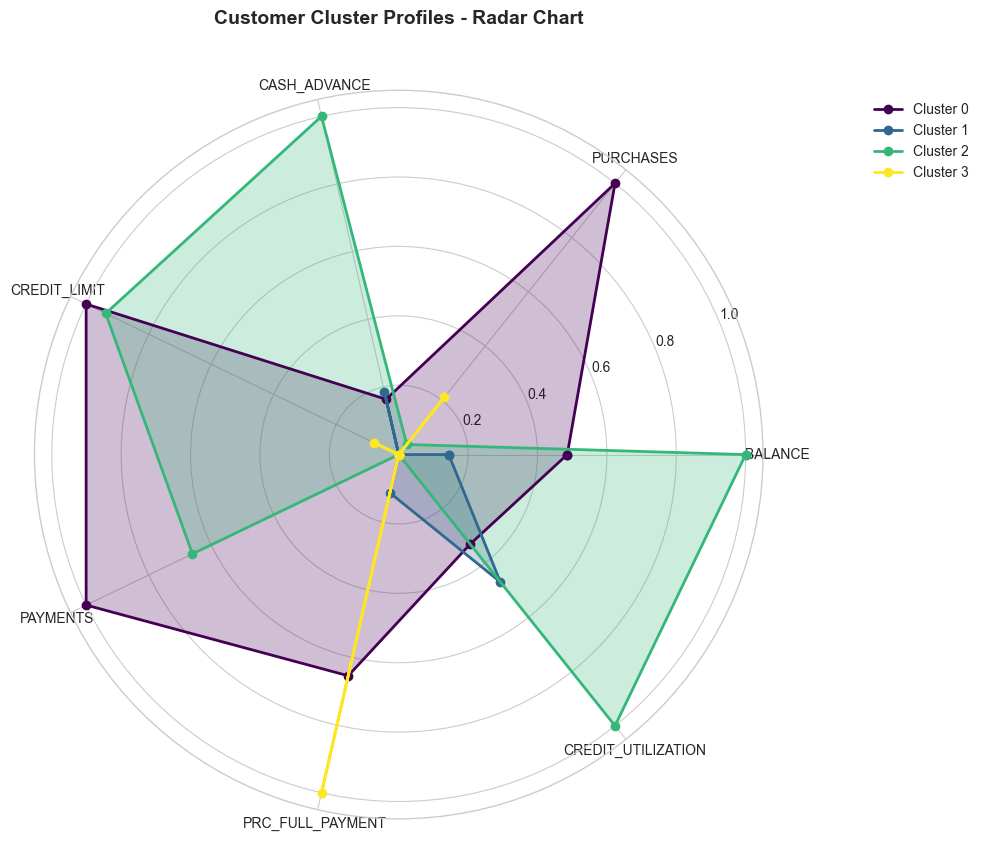

In [69]:
# Visualize cluster profiles using radar chart
from math import pi

# Normalize cluster profiles for radar chart
cluster_profile_normalized = (cluster_profile - cluster_profile.min()) / (cluster_profile.max() - cluster_profile.min())

# Select key features for radar chart
radar_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                  'PAYMENTS', 'PRC_FULL_PAYMENT', 'CREDIT_UTILIZATION']

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Number of features
num_features = len(radar_features)
angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
angles += angles[:1]  # Complete the loop

# Colors for each cluster
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

for idx, cluster in enumerate(cluster_profile_normalized.index):
    values = cluster_profile_normalized.loc[cluster, radar_features].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_features, fontsize=10)
ax.set_title('Customer Cluster Profiles - Radar Chart', fontsize=14, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

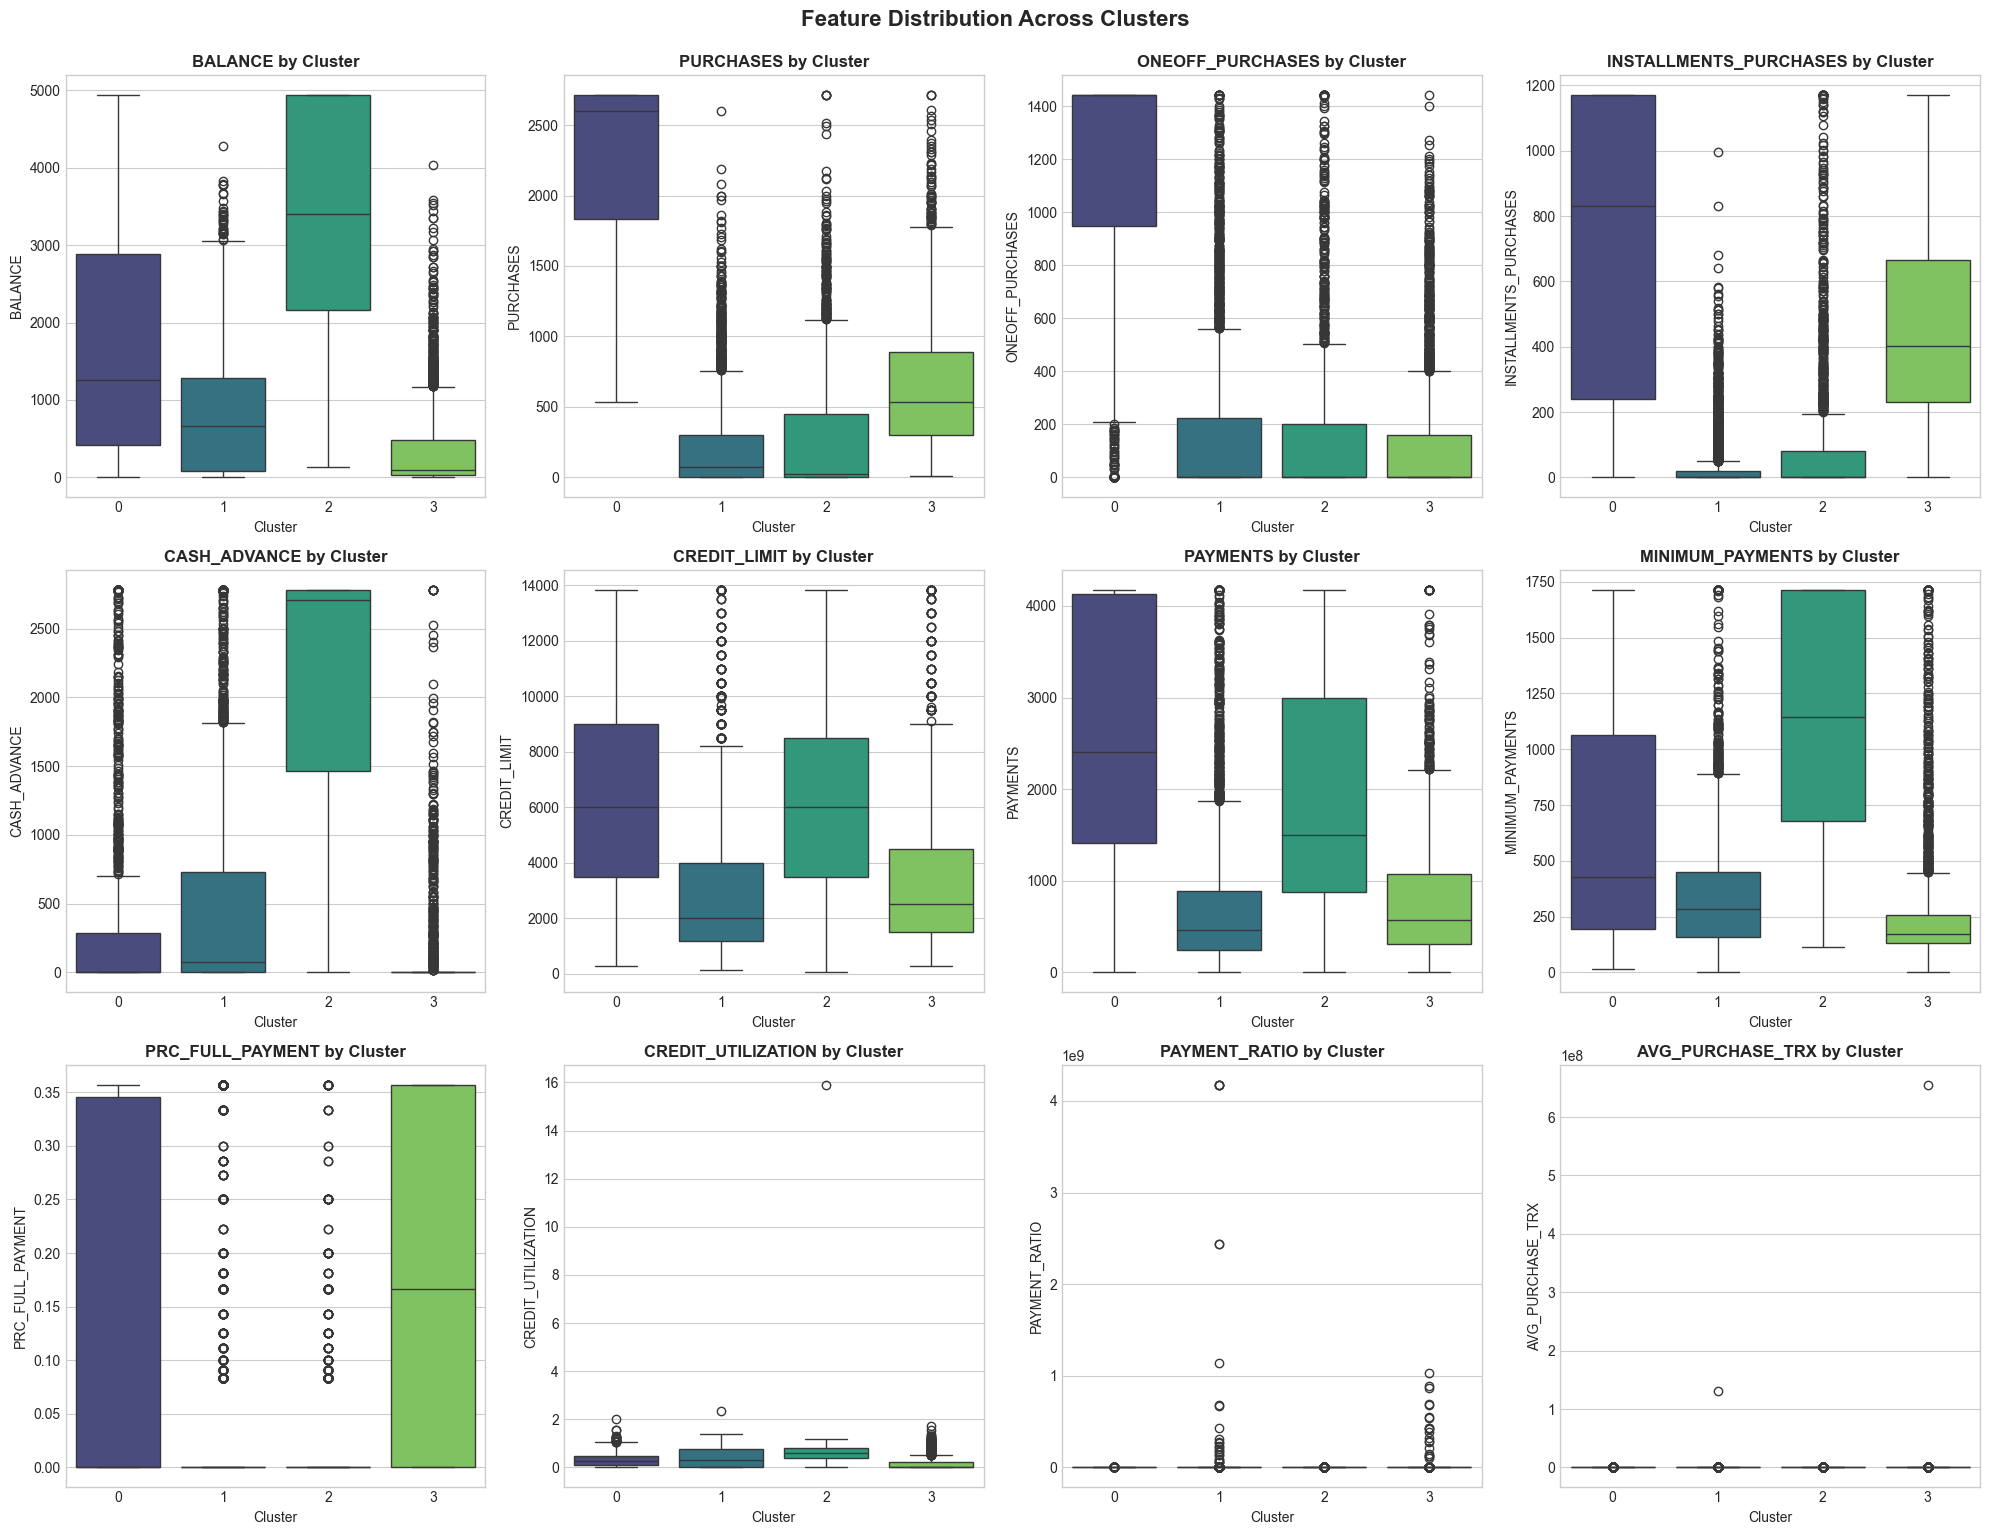

In [70]:
# Box plots to compare clusters across key features
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

plot_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
                'PRC_FULL_PAYMENT', 'CREDIT_UTILIZATION', 'PAYMENT_RATIO', 'AVG_PURCHASE_TRX']

for idx, feature in enumerate(plot_features):
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df_profile, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{feature} by Cluster', fontweight='bold')
    axes[idx].set_xlabel('Cluster')

plt.tight_layout()
plt.suptitle('Feature Distribution Across Clusters', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [71]:
# Generate Customer Segment Descriptions
print("=" * 60)
print("CUSTOMER SEGMENT DESCRIPTIONS")
print("=" * 60)

# Analyze each cluster
for cluster in range(optimal_k):
    cluster_data = df_profile[df_profile['KMeans_Cluster'] == cluster]
    
    print(f"\n{'='*50}")
    print(f"📊 CLUSTER {cluster}")
    print(f"{'='*50}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_profile)*100:.1f}%)")
    
    # Key metrics
    print(f"\nKey Characteristics:")
    print(f"  • Average Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"  • Average Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"  • Average Cash Advance: ${cluster_data['CASH_ADVANCE'].mean():.2f}")
    print(f"  • Average Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"  • Average Payments: ${cluster_data['PAYMENTS'].mean():.2f}")
    print(f"  • Credit Utilization: {cluster_data['CREDIT_UTILIZATION'].mean()*100:.1f}%")
    print(f"  • Full Payment Rate: {cluster_data['PRC_FULL_PAYMENT'].mean()*100:.1f}%")

CUSTOMER SEGMENT DESCRIPTIONS

📊 CLUSTER 0
Size: 1719 customers (19.2%)

Key Characteristics:
  • Average Balance: $1824.29
  • Average Purchases: $2263.17
  • Average Cash Advance: $412.72
  • Average Credit Limit: $6482.74
  • Average Payments: $2537.84
  • Credit Utilization: 33.4%
  • Full Payment Rate: 12.3%

📊 CLUSTER 1
Size: 3189 customers (35.6%)

Key Characteristics:
  • Average Balance: $806.24
  • Average Purchases: $219.03
  • Average Cash Advance: $457.41
  • Average Credit Limit: $3069.69
  • Average Payments: $783.51
  • Credit Utilization: 39.3%
  • Full Payment Rate: 4.0%

📊 CLUSTER 2
Size: 1750 customers (19.6%)

Key Characteristics:
  • Average Balance: $3357.11
  • Average Purchases: $295.10
  • Average Cash Advance: $2088.44
  • Average Credit Limit: $6269.70
  • Average Payments: $1941.14
  • Credit Utilization: 61.5%
  • Full Payment Rate: 2.3%

📊 CLUSTER 3
Size: 2292 customers (25.6%)

Key Characteristics:
  • Average Balance: $376.55
  • Average Purchases: $651

CLUSTER CHARACTERISTICS HEATMAP


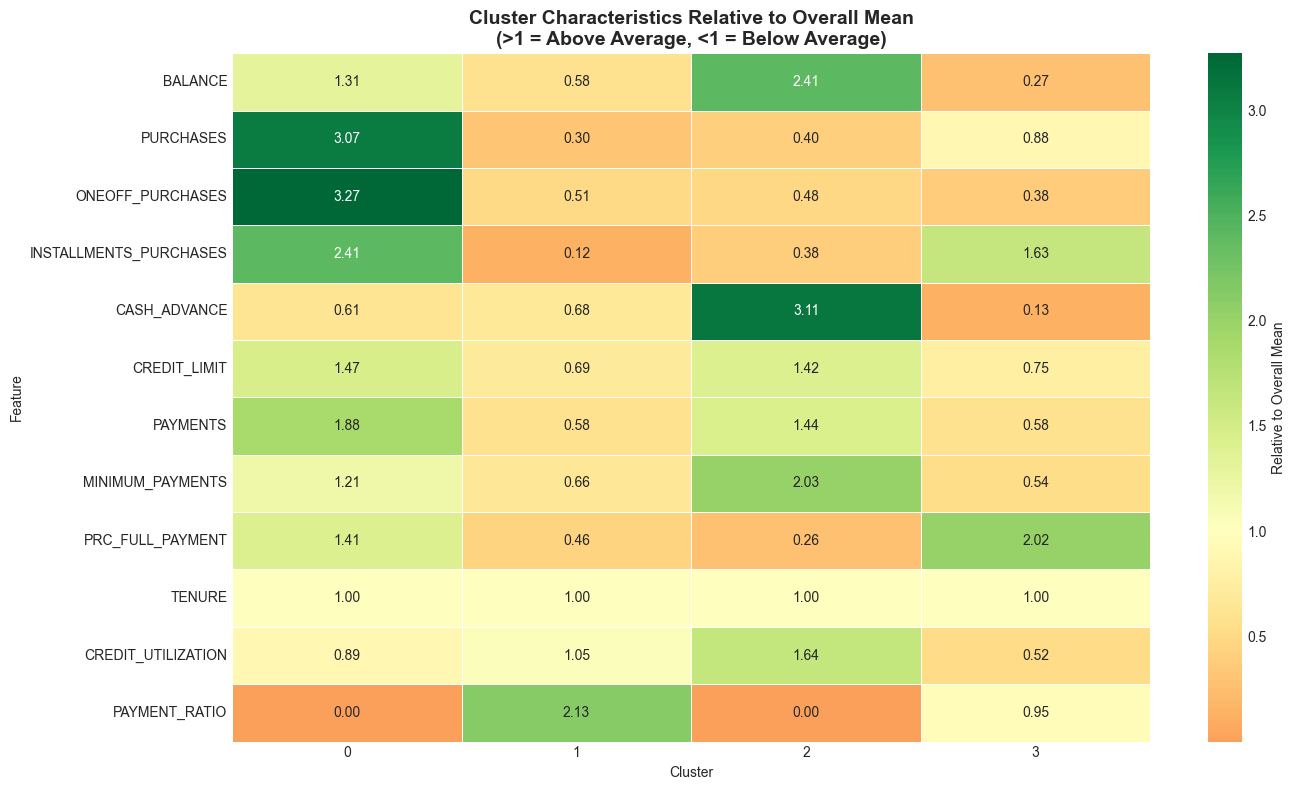


Interpretation Guide:
  • Values > 1: Cluster is ABOVE the overall average for that feature
  • Values < 1: Cluster is BELOW the overall average for that feature
  • Values ≈ 1: Cluster is similar to the overall average


In [72]:
# Create a heatmap showing normalized cluster characteristics
print("=" * 60)
print("CLUSTER CHARACTERISTICS HEATMAP")
print("=" * 60)

# Normalize by dividing by overall mean to see relative differences
overall_mean = df_profile[profile_features].mean()
cluster_relative = cluster_profile / overall_mean

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_relative.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=1, linewidths=0.5,
            cbar_kws={'label': 'Relative to Overall Mean'})
plt.title('Cluster Characteristics Relative to Overall Mean\n(>1 = Above Average, <1 = Below Average)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation Guide:")
print("  • Values > 1: Cluster is ABOVE the overall average for that feature")
print("  • Values < 1: Cluster is BELOW the overall average for that feature")
print("  • Values ≈ 1: Cluster is similar to the overall average")

## 10. Conclusions & Business Recommendations

In [73]:
# Final Summary and Conclusions
print("=" * 70)
print("                    FINAL SUMMARY & CONCLUSIONS")
print("=" * 70)

print("\n📋 PROJECT SUMMARY")
print("-" * 50)
print(f"""
This project implemented an end-to-end customer clustering pipeline for
credit card customer segmentation. The analysis included:

1. DATA PREPROCESSING:
   • Handled missing values using median imputation
   • Outlier treatment using IQR-based capping
   • Feature scaling using StandardScaler

2. FEATURE ENGINEERING:
   • Created 8 derived features including Credit Utilization,
     Payment Ratio, Cash Advance Ratio, etc.

3. CLUSTERING MODELS APPLIED:
   • K-Means Clustering (k={optimal_k})
   • Hierarchical Clustering (Agglomerative with {best_linkage} linkage)
   • DBSCAN (eps={best_eps}, min_samples={best_min_samples})

4. MODEL COMPARISON:
""")

# Display comparison table
display(comparison_df)

print(f"""
5. KEY FINDINGS:
   • K-Means provided {optimal_k} distinct customer segments
   • Each cluster exhibits unique spending and payment patterns
   • Clusters can be used for targeted marketing strategies

6. BUSINESS RECOMMENDATIONS:
   Based on cluster profiles, different strategies can be applied:
   • High-value customers: Premium rewards and exclusive offers
   • Cash advance users: Financial advisory services
   • Low activity customers: Engagement campaigns
   • Risky customers: Credit limit review and monitoring
""")

print("=" * 70)
print("                         END OF ANALYSIS")
print("=" * 70)

                    FINAL SUMMARY & CONCLUSIONS

📋 PROJECT SUMMARY
--------------------------------------------------

This project implemented an end-to-end customer clustering pipeline for
credit card customer segmentation. The analysis included:

1. DATA PREPROCESSING:
   • Handled missing values using median imputation
   • Outlier treatment using IQR-based capping
   • Feature scaling using StandardScaler

2. FEATURE ENGINEERING:
   • Created 8 derived features including Credit Utilization,
     Payment Ratio, Cash Advance Ratio, etc.

3. CLUSTERING MODELS APPLIED:
   • K-Means Clustering (k=4)
   • Hierarchical Clustering (Agglomerative with complete linkage)
   • DBSCAN (eps=3.0, min_samples=5)

4. MODEL COMPARISON:



,Model,Silhouette Score,Calinski-Harabasz,Davies-Bouldin,Num Clusters,Noise Points
0,K-Means,0.18,1807.69,1.68,4,0
1,Hierarchical (complete),0.83,394.56,0.22,4,0
2,DBSCAN,NaN,NaN,NaN,1,71



5. KEY FINDINGS:
   • K-Means provided 4 distinct customer segments
   • Each cluster exhibits unique spending and payment patterns
   • Clusters can be used for targeted marketing strategies

6. BUSINESS RECOMMENDATIONS:
   Based on cluster profiles, different strategies can be applied:
   • High-value customers: Premium rewards and exclusive offers
   • Cash advance users: Financial advisory services
   • Low activity customers: Engagement campaigns
   • Risky customers: Credit limit review and monitoring

                         END OF ANALYSIS


In [74]:
# Save clustering results to CSV
output_df = df.copy()
output_df['KMeans_Cluster'] = kmeans_labels
output_df['Hierarchical_Cluster'] = agg_results[best_linkage]
output_df['DBSCAN_Cluster'] = dbscan_labels

output_df.to_csv('customer_clustering_results.csv', index=False)
print("✅ Results saved to 'customer_clustering_results.csv'")

# Save model comparison results
comparison_df.to_csv('clustering_model_comparison.csv', index=False)
print("✅ Model comparison saved to 'clustering_model_comparison.csv'")

✅ Results saved to 'customer_clustering_results.csv'
✅ Model comparison saved to 'clustering_model_comparison.csv'
